##### In this notebook, we will:
 * read in the files
 * Look at and understand the basics of tSNE  
 * The end goal here is to build a series of visualizations, both in 2D and perhaps in 3D

tSNE is a way to preserve the nearness and distance of different groupings, while reducing them from high dimensional space, down to 2 or 3 dimensional space.

In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
import pickle
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
with open('../data/complete_corpus.txt', 'rb') as file:
    cf_kv = pickle.load(file)

In [3]:
print([value for value in cf_kv.values()][26])


 Origen
     __________________________________________________________________


   Origen De Principiis.

   ------------------------

   Preface.

   1.  All who believe and are assured that grace and truth were obtained
   through Jesus Christ, and who know Christ to be the truth, agreeably to
   His own declaration, "I am the truth," [1915] derive the knowledge
   which incites men to a good and happy life from no other source than
   from the very words and teaching of Christ.  And by the words of Christ
   we do not mean those only which He spake when He became man and
   tabernacled in the flesh; for before that time, Christ, the Word of
   God, was in Moses and the prophets.  For without the Word of God, how
   could they have been able to prophesy of Christ?  And were it not our
   purpose to confine the present treatise within the limits of all
   attainable brevity, it would not be difficult to show, in proof of this
   statement, out of the Holy Scriptures, how Moses or th

In [4]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') #tfidf vectorizer w/ stopwords removed.

cf_kv_tokenized={}

for key, value in cf_kv.items():
    tokenized = sent_tokenize(value) #tokenize on sentences
    cf_kv_tokenized[key]=tokenized #read back into key:value pairs

X = vectorizer.fit_transform(cf_kv_tokenized).toarray() #need to add the toarray() otherwise the tSNE gets confused with the shape

In this case we are reducing down from 80 dimensions to 2 (or 3)..

In [5]:
X.shape

(46, 85)

In [6]:
#Link
embeddings = X

In [7]:
#Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

In [9]:
#need to make simple labels to annotate plots...
labels=cf_kv.keys()

In [8]:
print(type(embeddings_2d))

<class 'numpy.ndarray'>


In [18]:
print(type(labels))

<class 'dict_keys'>


In [10]:
df1 = pd.DataFrame(embeddings_2d, columns=['Component 1', 'Component 2'])
df1['Label'] = labels

In [19]:
#save labels and dump to folder
labels2=list(labels)
with open('../pngs/labels2.set', 'wb') as file:
    pickle.dump(labels2, file)

In [11]:
with open('../pngs/embeddings_2d.ndarray', 'wb') as file:
    pickle.dump(embeddings_2d, file)

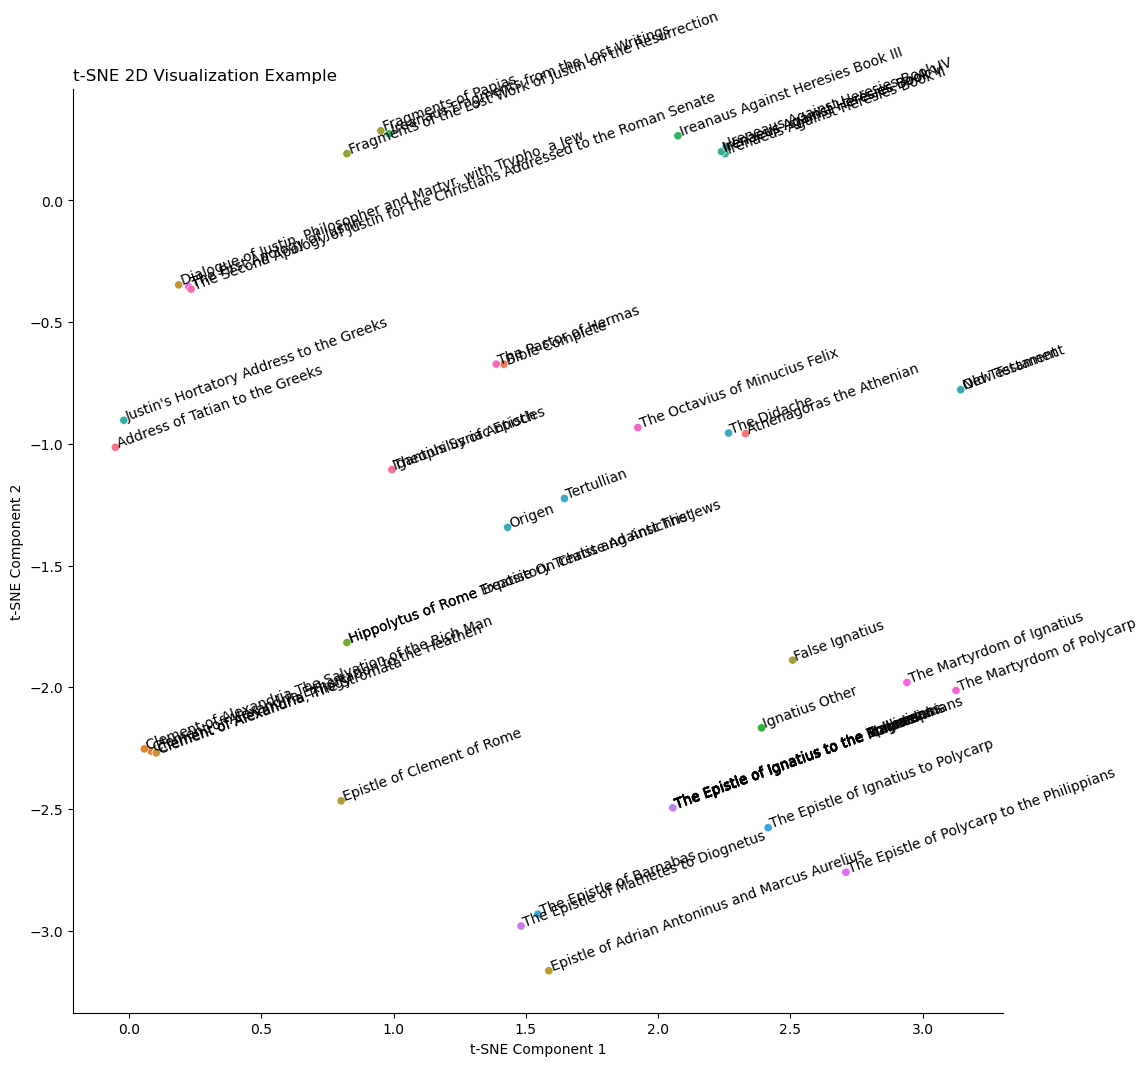

In [12]:
#Plotting the 2D dimensions of tSNE
plt.figure(figsize=(12, 12))
ax=sns.scatterplot(x='Component 1', y='Component 2', data=df1, hue='Label')
sns.despine()
ax.get_legend().remove()
# build a loop? annotate?
for i, point in df1.iterrows():
    plt.text(point['Component 1'], point['Component 2'], str(point['Label']), rotation=20)

plt.title('t-SNE 2D Visualization Example', loc='left')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
#plt.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

In [13]:
fig = px.scatter(
     x=embeddings_2d[:, 0], 
     y=embeddings_2d[:, 1],
     text=labels,  # Add this line to include labels
     title='t-SNE 2D Visualization of Text Embeddings'
 )

fig.update_traces(marker=dict(size=3),  # Shrink dots
                  textposition='top center')  # Position labels

# Update layout for white background
fig.update_layout(
    plot_bgcolor='white',  # Set plot area background color to white
    paper_bgcolor='white'  # Set paper background color to white
)

fig.show()

In [14]:
#Another example. this one in 3D

tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

In [15]:
with open('../pngs/embeddings_3d.ndarray', 'wb') as file:
    pickle.dump(embeddings_3d, file)

In [16]:
df = pd.DataFrame(embeddings_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Label'] = labels

In [17]:
#Plotting in 3D using plotly
fig = px.scatter_3d(
     x=embeddings_3d[:, 0], 
     y=embeddings_3d[:, 1], 
     z=embeddings_3d[:, 2],
     text=labels,  # Add this line to include labels
     title='t-SNE 3D Visualization of Text Embeddings'
 )

fig.update_traces(marker=dict(size=3),  # Shrink dots
                  textposition='top center')  # Position labels

fig.show()
